In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno
from matplotlib.ticker import MaxNLocator
from colorama import Fore, init

In [2]:
df = pd.read_csv("spa.csv")

In [3]:
def get_pretty_frame(df):
    return df.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#3b528b'),
                                            ('color', 'black'),
                                            ('border', '1px solid #dddddd')]},
         {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
         {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'white')]},
         {'selector': 'tbody td', 'props': [('border', '1px solid #dddddd')]}]
    ).set_properties(**{'text-align': 'center'})


In [4]:
get_pretty_frame(df.head())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.000000
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.000000
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.000000
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.000000
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.000000


In [5]:
df_summary = df.describe()
get_pretty_frame(df_summary)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<Axes: >

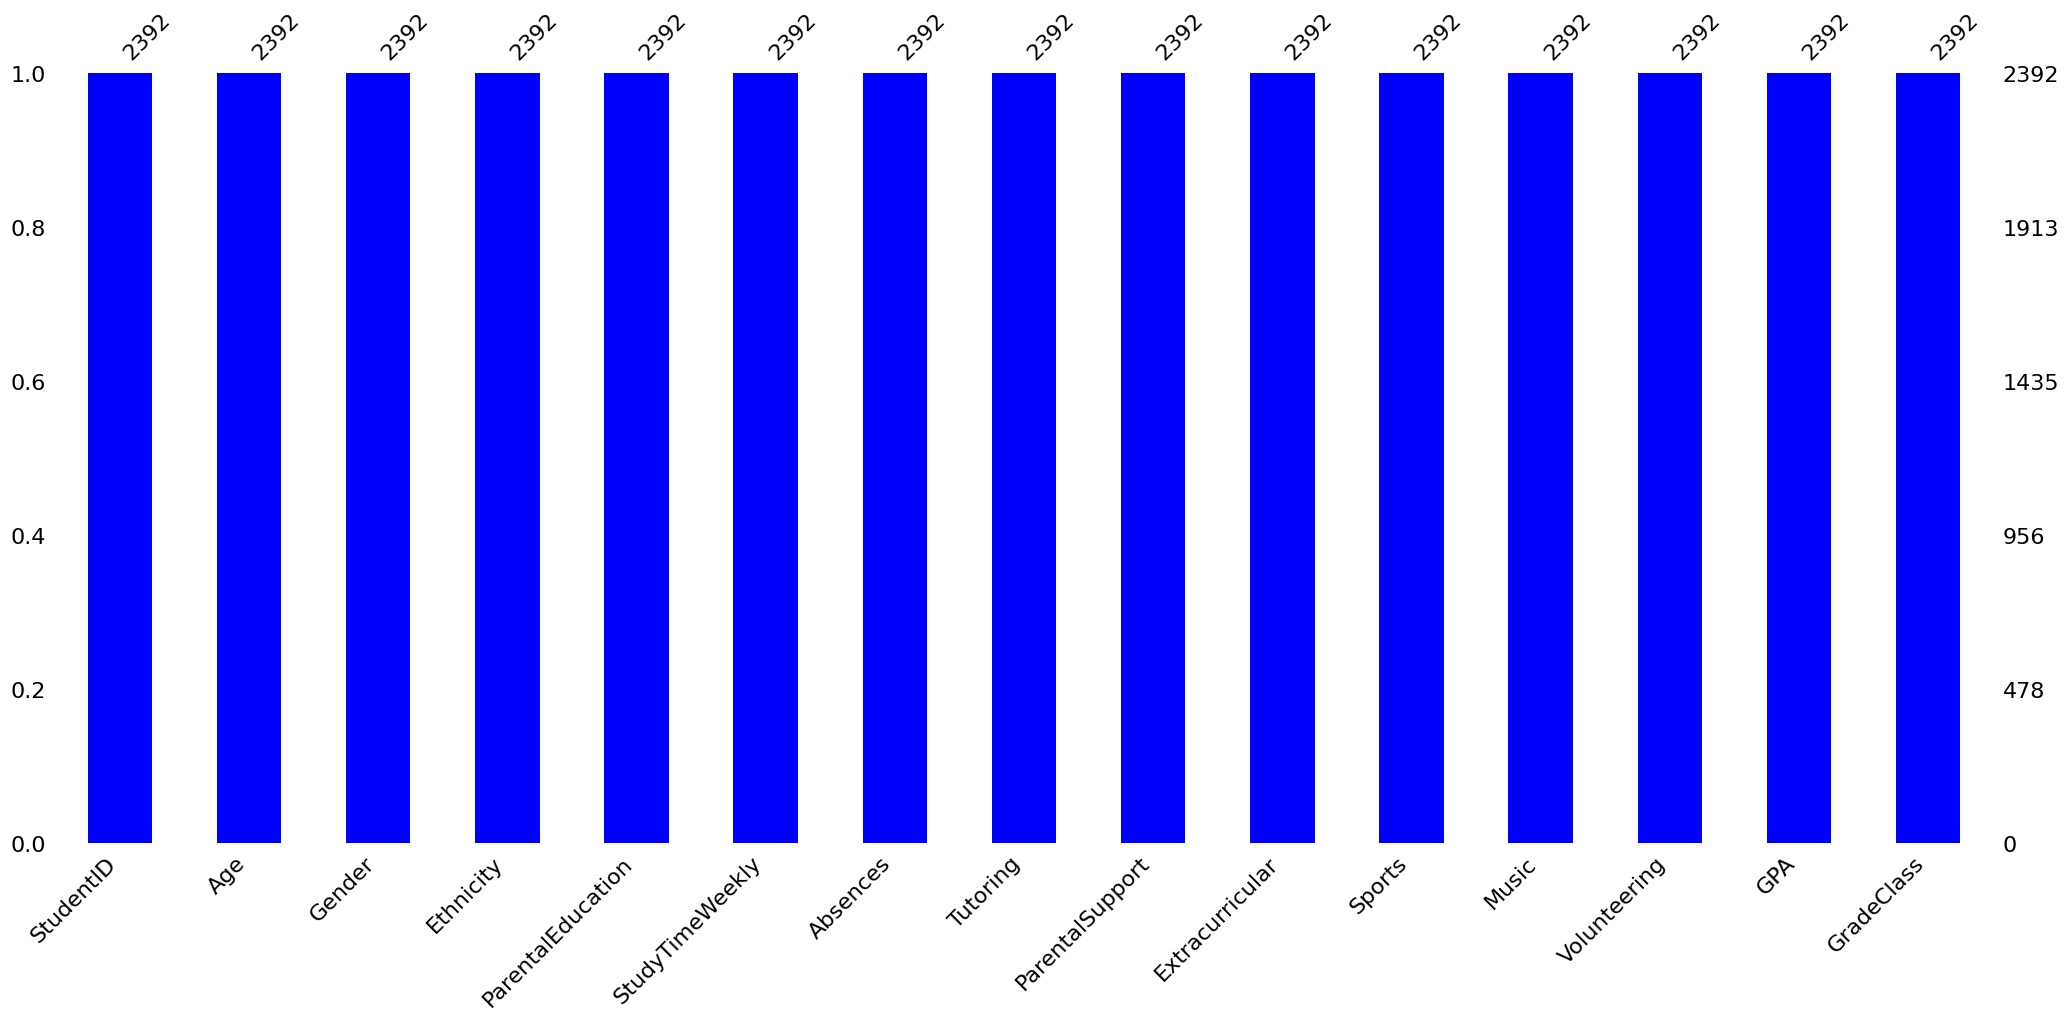

In [6]:
msno.bar(df, color = 'b')

In [7]:
  df.duplicated().sum()

0

In [8]:
df.columns 

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [9]:
specified_columns = ['Sports', 'Volunteering', 'ParentalSupport', 'Music', 'Extracurricular', 'ParentalEducation', 'Age', 'Gender', 'Tutoring', 'GradeClass', 'Ethnicity']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')  

Total unique values for Sports: 2
0: 1666
1: 726


Total unique values for Volunteering: 2
0: 2016
1: 376


Total unique values for ParentalSupport: 5
2: 740
3: 697
1: 489
4: 254
0: 212


Total unique values for Music: 2
0: 1921
1: 471


Total unique values for Extracurricular: 2
0: 1475
1: 917


Total unique values for ParentalEducation: 5
2: 934
1: 728
3: 367
0: 243
4: 120


Total unique values for Age: 4
15: 630
16: 593
17: 587
18: 582


Total unique values for Gender: 2
1: 1222
0: 1170


Total unique values for Tutoring: 2
0: 1671
1: 721


Total unique values for GradeClass: 5
4.0: 1211
3.0: 414
2.0: 391
1.0: 269
0.0: 107


Total unique values for Ethnicity: 4
0: 1207
1: 493
2: 470
3: 222




In [10]:
df = df.drop(['StudentID'], axis=1)
threshold = 8

cat_exc = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

detected_cat_col = [col for col in df.columns if df[col].nunique() <= threshold and df[col].dtype in ['int64', 'float64']]

cat_col = list(set(detected_cat_col + cat_exc))

num_col = [col for col in df.columns if col not in cat_col and df[col].dtype in ['int64', 'float64']]

print("Categorical Columns:", cat_col)
print("Numerical Columns:", num_col)

Categorical Columns: ['Volunteering', 'Age', 'Sports', 'Music', 'Tutoring', 'GradeClass', 'ParentalSupport', 'ParentalEducation', 'Extracurricular', 'Gender', 'Ethnicity']
Numerical Columns: ['StudyTimeWeekly', 'Absences', 'GPA']


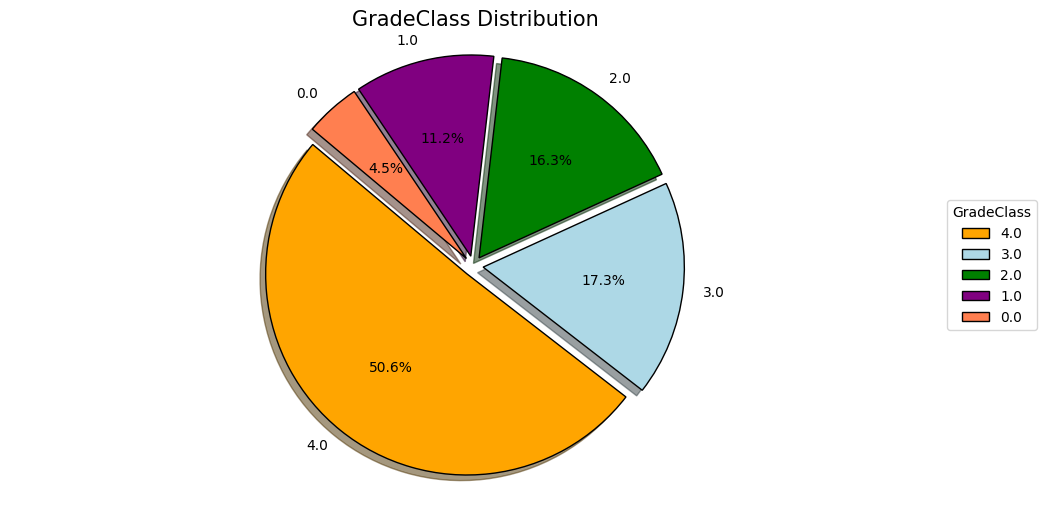

In [11]:
grade_counts = df['GradeClass'].value_counts()
grades = grade_counts.index.tolist()
counts = grade_counts.values.tolist()
total_counts = sum(counts)
percentages = [(count / total_counts) * 100 for count in counts]

colors = ['orange', 'lightblue', 'green', 'purple', 'coral']
explode = [0.05] * len(grades)  #
plt.figure(figsize=(12, 6))
plt.pie(percentages, labels=grades, colors=colors, autopct='%1.1f%%', startangle=140, 
        shadow=True, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.legend(grades, title="GradeClass", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('GradeClass Distribution', fontsize=15)
plt.axis('equal') 
plt.show()

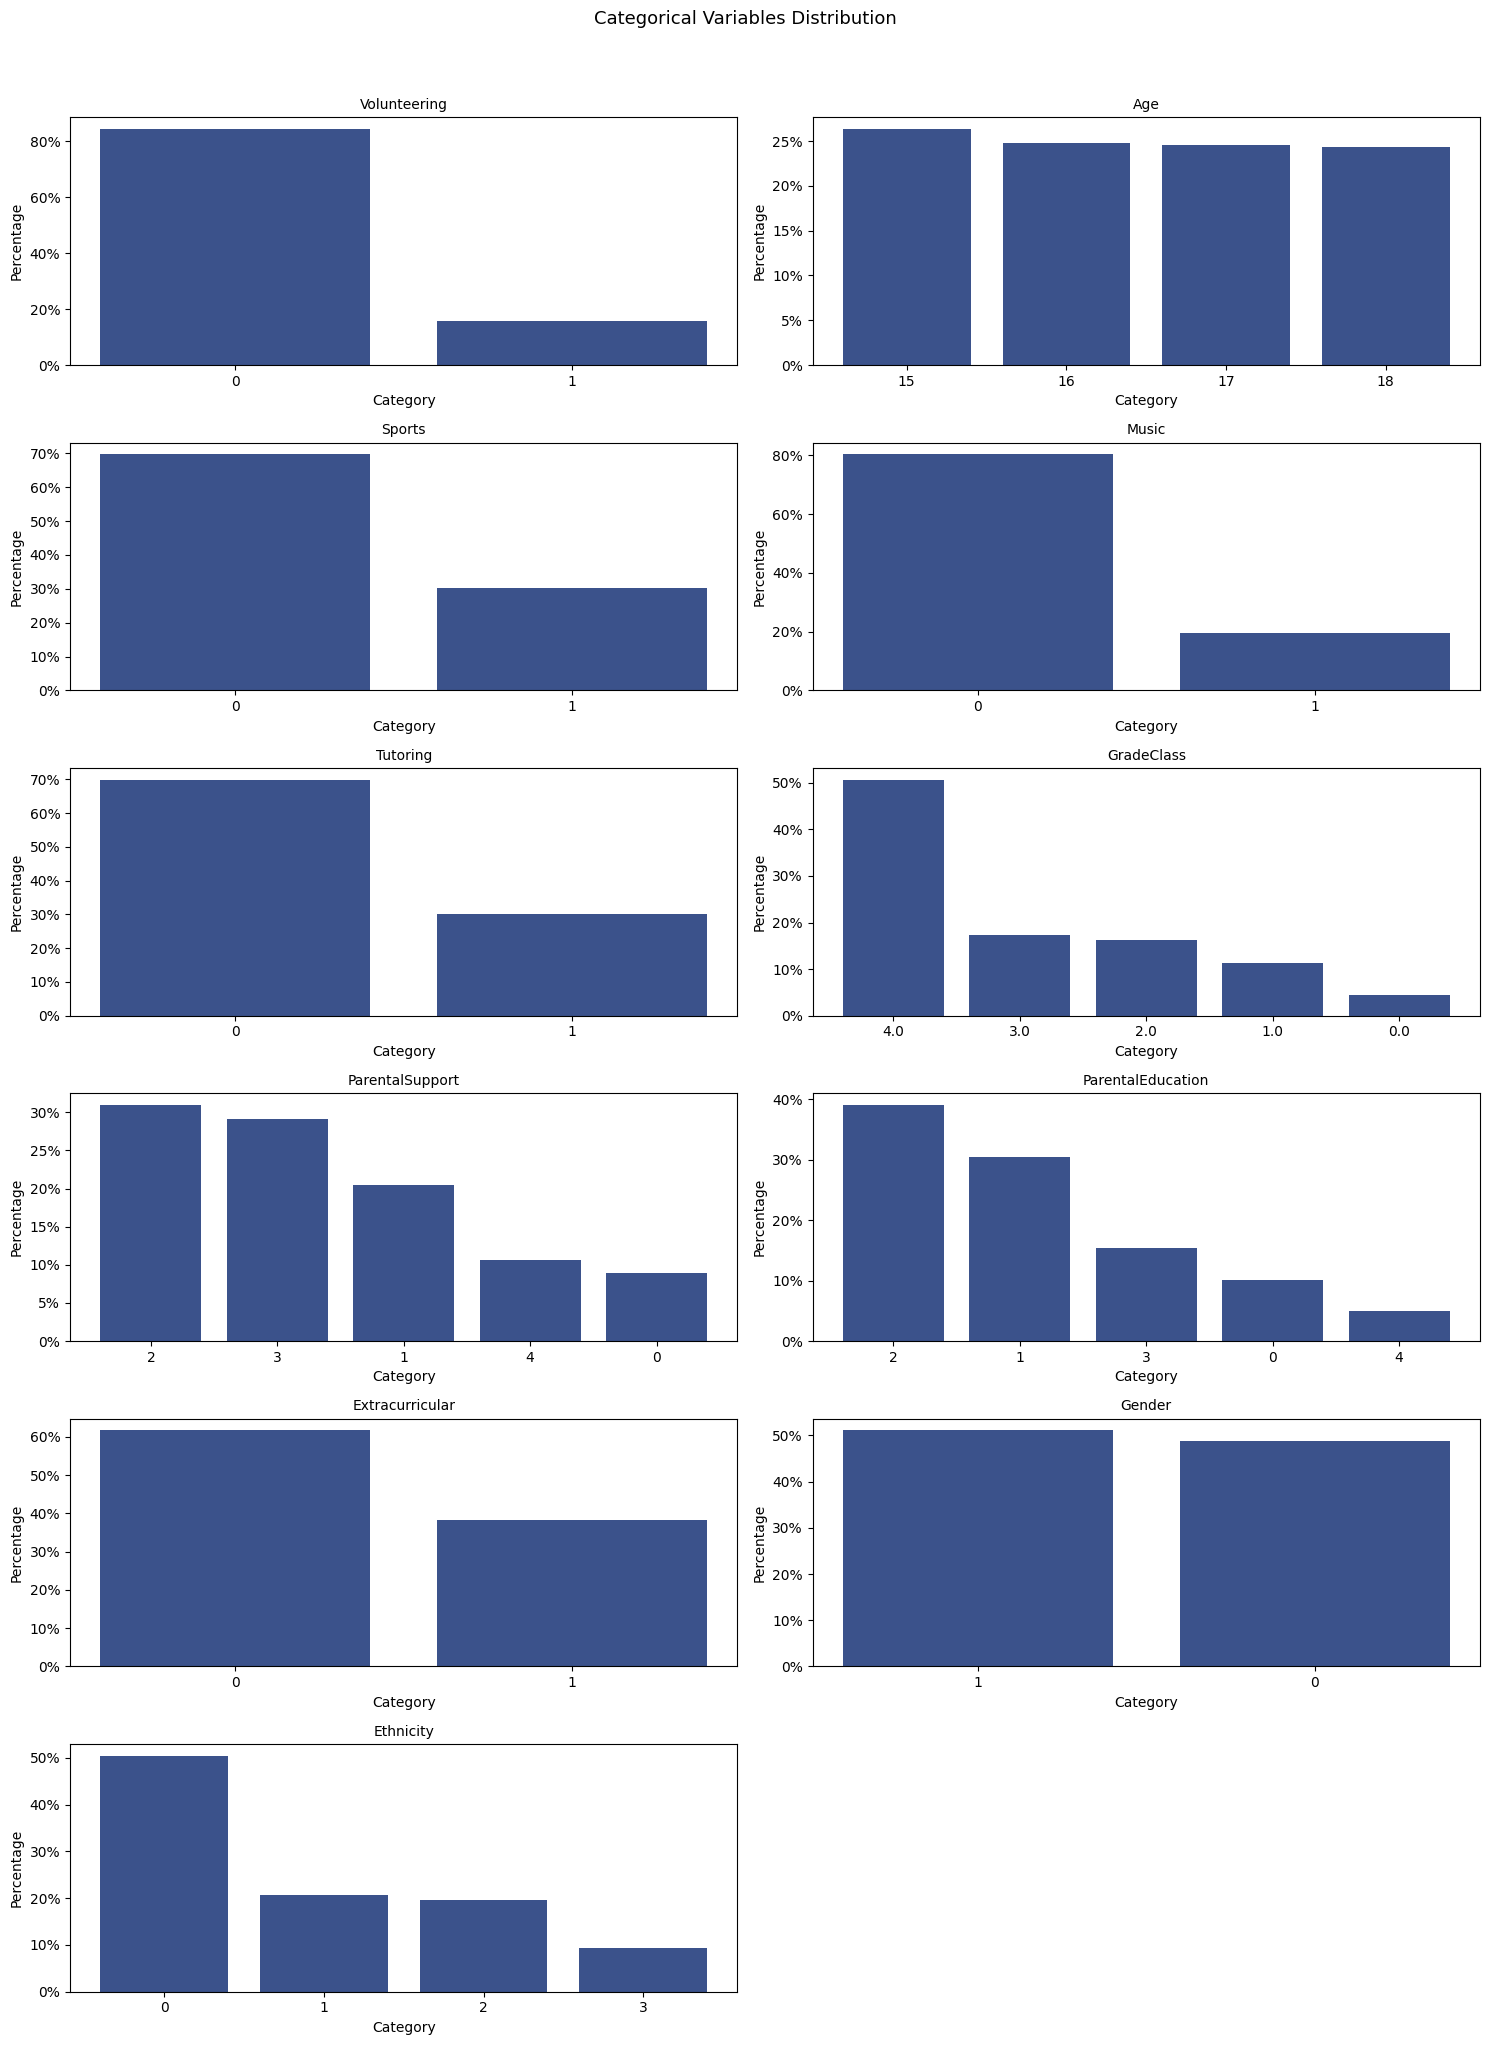

In [12]:
fig, axs = plt.subplots(len(cat_col) // 2 + len(cat_col) % 2, 2, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(cat_col):
    vc = df[col].value_counts(normalize=True)
    axs[i].bar(vc.index.astype(str), vc, color='#3b528b')
    axs[i].set_title(col, fontsize=10)
    axs[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('Percentage')
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])
plt.suptitle('Categorical Variables Distribution', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

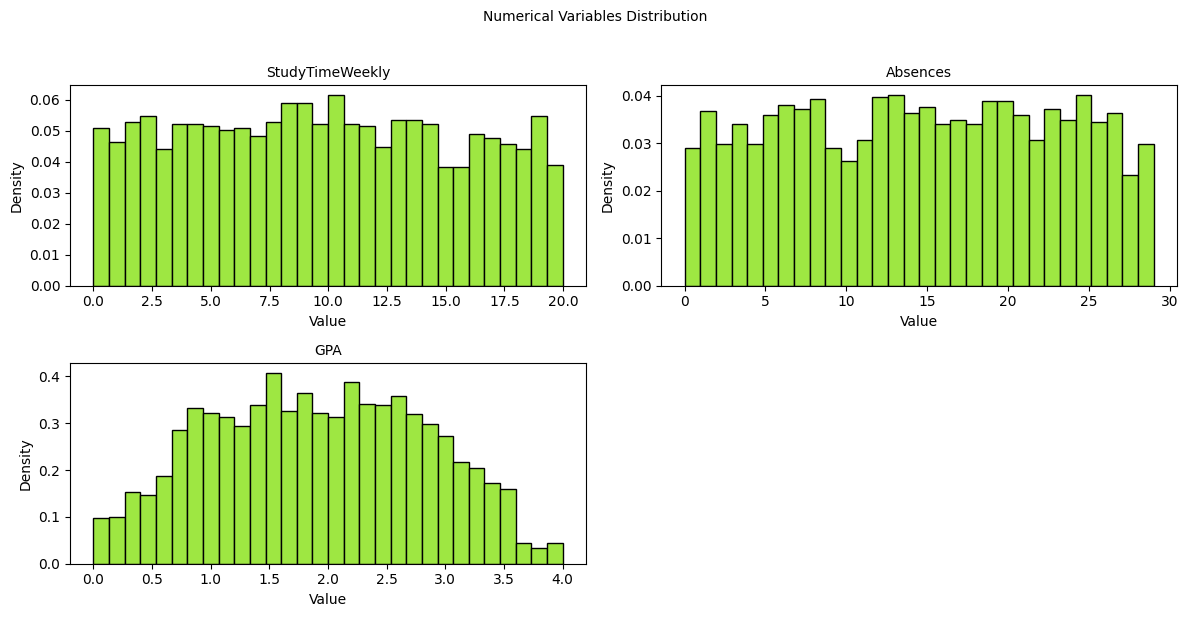

In [13]:
fig, axs = plt.subplots(len(num_col) // 2 + len(num_col) % 2, 2, figsize=(12, 6))
axs = axs.flatten()
for i, col in enumerate(num_col):
    axs[i].hist(df[col], bins=30, color='#9ee742', edgecolor='black', density=True)
    axs[i].set_title(col, fontsize=10)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])
plt.suptitle('Numerical Variables Distribution', fontsize=10, y=1.02)
plt.tight_layout()
plt.show()

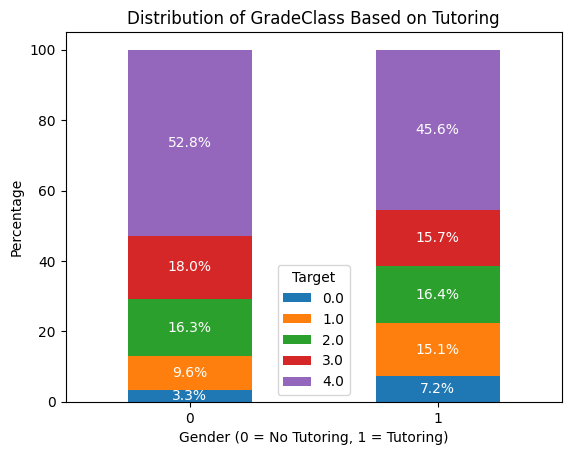

In [14]:
crosstab_gender = pd.crosstab(df['Tutoring'], df['GradeClass'])
crosstab_gender = crosstab_gender.div(crosstab_gender.sum(axis=1), axis=0) * 100
ax_gender = crosstab_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender (0 = No Tutoring, 1 = Tutoring)')
plt.ylabel('Percentage')
plt.title('Distribution of GradeClass Based on Tutoring')
plt.legend(title='Target')
plt.xticks(rotation=0)
for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_gender.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                ha='center', va='center', fontsize=10, color='white')
plt.show()

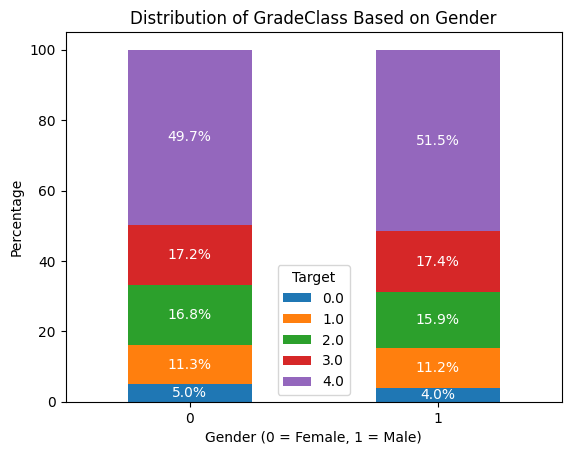

In [15]:
crosstab_gender = pd.crosstab(df['Gender'], df['GradeClass'])
crosstab_gender = crosstab_gender.div(crosstab_gender.sum(axis=1), axis=0) * 100
ax_gender = crosstab_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Percentage')
plt.title('Distribution of GradeClass Based on Gender')
plt.legend(title='Target')
plt.xticks(rotation=0)
for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_gender.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                ha='center', va='center', fontsize=10, color='white')
plt.show()

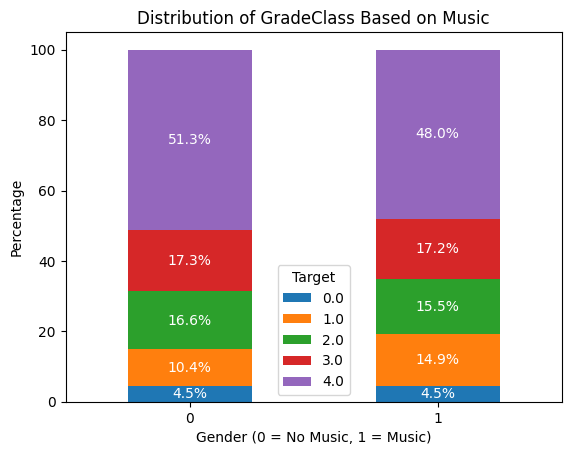

In [16]:
crosstab_gender = pd.crosstab(df['Music'], df['GradeClass'])
crosstab_gender = crosstab_gender.div(crosstab_gender.sum(axis=1), axis=0) * 100
ax_gender = crosstab_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender (0 = No Music, 1 = Music)')
plt.ylabel('Percentage')
plt.title('Distribution of GradeClass Based on Music')
plt.legend(title='Target')
plt.xticks(rotation=0)
for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_gender.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                ha='center', va='center', fontsize=10, color='white')
plt.show()

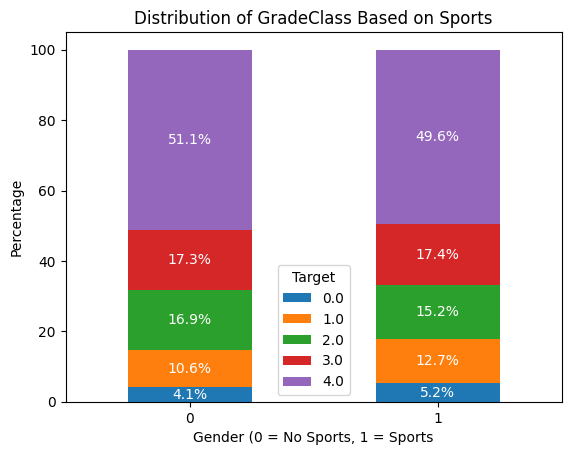

In [17]:
crosstab_gender = pd.crosstab(df['Sports'], df['GradeClass'])
crosstab_gender = crosstab_gender.div(crosstab_gender.sum(axis=1), axis=0) * 100
ax_gender = crosstab_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender (0 = No Sports, 1 = Sports')
plt.ylabel('Percentage')
plt.title('Distribution of GradeClass Based on Sports')
plt.legend(title='Target')
plt.xticks(rotation=0)
for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_gender.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                ha='center', va='center', fontsize=10, color='white')
plt.show()

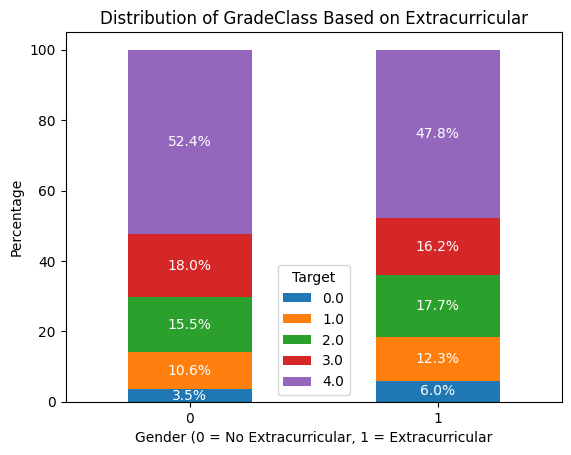

In [18]:
crosstab_gender = pd.crosstab(df['Extracurricular'], df['GradeClass'])
crosstab_gender = crosstab_gender.div(crosstab_gender.sum(axis=1), axis=0) * 100
ax_gender = crosstab_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender (0 = No Extracurricular, 1 = Extracurricular')
plt.ylabel('Percentage')
plt.title('Distribution of GradeClass Based on Extracurricular')
plt.legend(title='Target')
plt.xticks(rotation=0)
for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_gender.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                ha='center', va='center', fontsize=10, color='white')
plt.show()

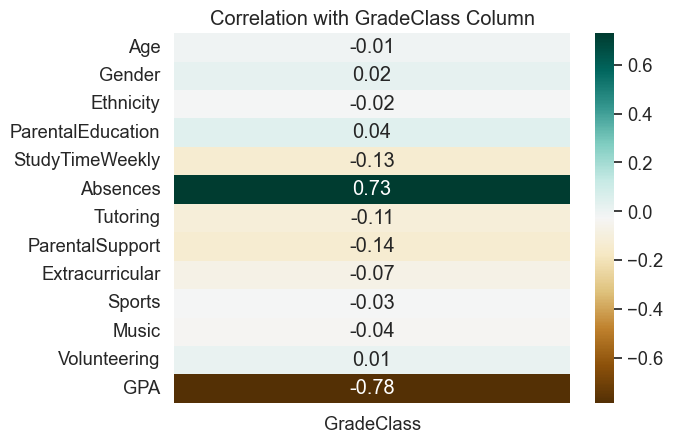

In [19]:
corr = df.corr()
target_corr = corr['GradeClass'].drop('GradeClass')
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="BrBG", annot=True, fmt='.2f')
plt.title('Correlation with GradeClass Column')
plt.show()

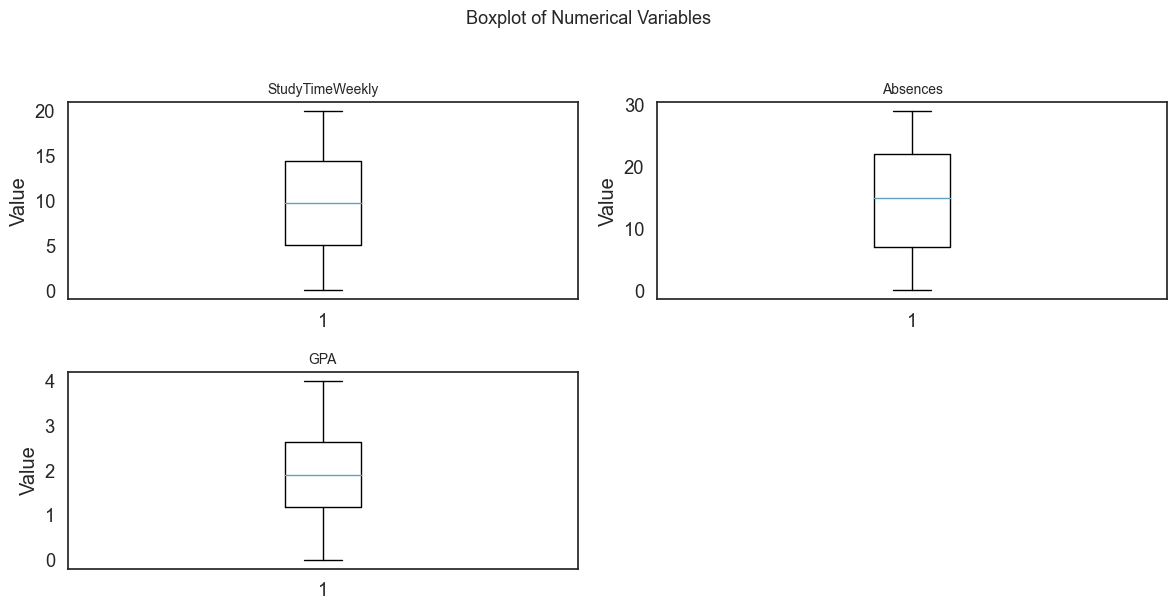

In [20]:
df1 = df.copy()
fig, axs = plt.subplots(len(num_col) // 2 + len(num_col) % 2, 2, figsize=(12, 6))
axs = axs.flatten()
for i, col in enumerate(num_col):
    axs[i].boxplot(df1[col])
    axs[i].set_title(col, fontsize=10)
    axs[i].set_ylabel('Value')
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])
plt.suptitle('Boxplot of Numerical Variables', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

Evaluating Decision Tree...
Decision Tree: Accuracy = 0.8497
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62        22
         1.0       0.68      0.86      0.76        49
         2.0       0.87      0.79      0.83        85
         3.0       0.85      0.81      0.83        86
         4.0       0.90      0.91      0.90       237

    accuracy                           0.85       479
   macro avg       0.80      0.78      0.79       479
weighted avg       0.85      0.85      0.85       479



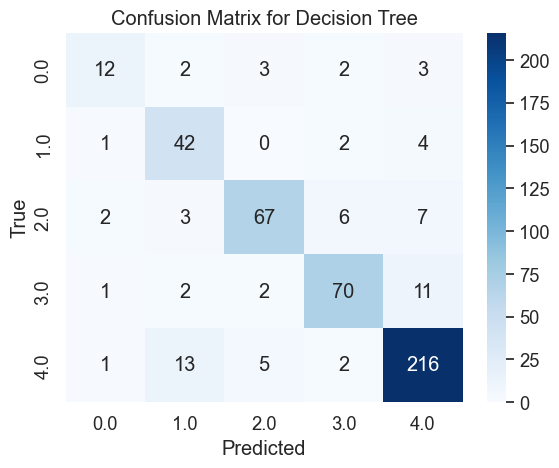

Evaluating Random Forest...
Random Forest: Accuracy = 0.8998
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43        22
         1.0       0.75      0.84      0.79        49
         2.0       0.90      0.86      0.88        85
         3.0       0.88      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.90       479
   macro avg       0.89      0.77      0.79       479
weighted avg       0.90      0.90      0.89       479



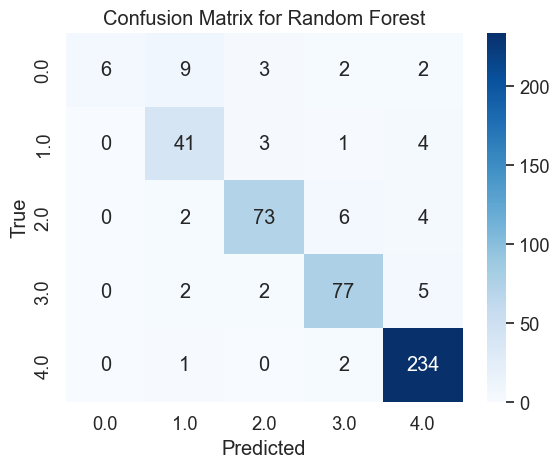

Evaluating Gradient Boosting...
Gradient Boosting: Accuracy = 0.9019
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.77      0.88      0.82        49
         2.0       0.92      0.86      0.89        85
         3.0       0.89      0.85      0.87        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.90       479
   macro avg       0.88      0.84      0.85       479
weighted avg       0.90      0.90      0.90       479



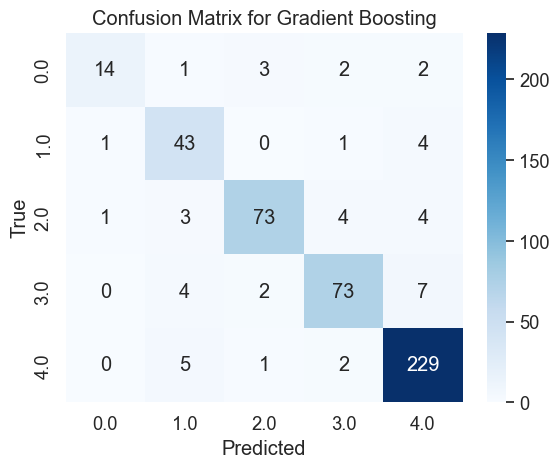

Evaluating SVC...
SVC: Accuracy = 0.8058
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.24        22
         1.0       0.61      0.67      0.64        49
         2.0       0.77      0.73      0.75        85
         3.0       0.72      0.70      0.71        86
         4.0       0.88      0.96      0.92       237

    accuracy                           0.81       479
   macro avg       0.80      0.64      0.65       479
weighted avg       0.81      0.81      0.79       479



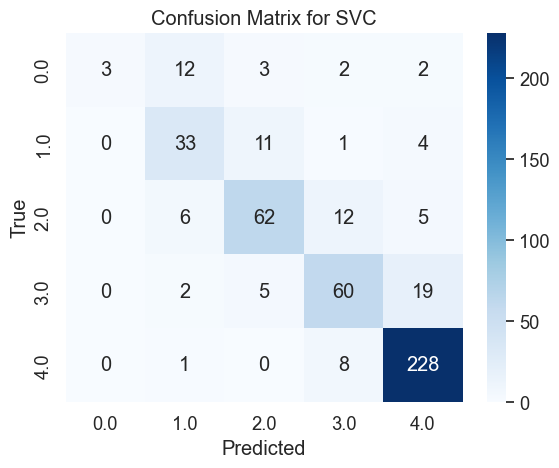

Evaluating LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 33
[LightGBM] [Info] Start training from score -3.113777
[LightGBM] [Info] Start training from score -2.162800
[LightGBM] [Info] Start training from score -1.832843
[LightGBM] [Info] Start training from score -1.763414
[LightGBM] [Info] Start training from score -0.675017


K:\Software\Python\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "K:\Software\Python\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


LGBM: Accuracy = 0.9165
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        22
         1.0       0.88      0.86      0.87        49
         2.0       0.94      0.85      0.89        85
         3.0       0.88      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.89      0.84      0.86       479
weighted avg       0.92      0.92      0.91       479



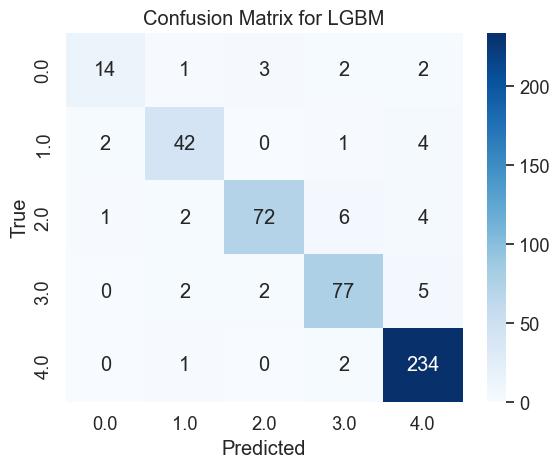

Evaluating Bagging...
Bagging: Accuracy = 0.8977
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.59      0.67        22
         1.0       0.81      0.88      0.84        49
         2.0       0.94      0.85      0.89        85
         3.0       0.88      0.84      0.86        86
         4.0       0.92      0.97      0.94       237

    accuracy                           0.90       479
   macro avg       0.86      0.82      0.84       479
weighted avg       0.90      0.90      0.90       479



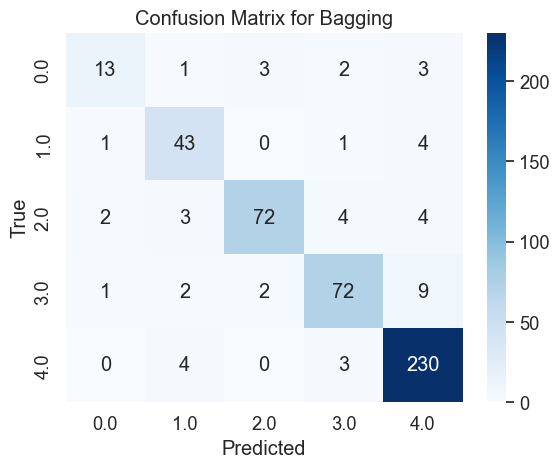

Evaluating XGB...
XGB: Accuracy = 0.9081
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.59      0.68        22
         1.0       0.86      0.86      0.86        49
         2.0       0.93      0.84      0.88        85
         3.0       0.86      0.88      0.87        86
         4.0       0.93      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479



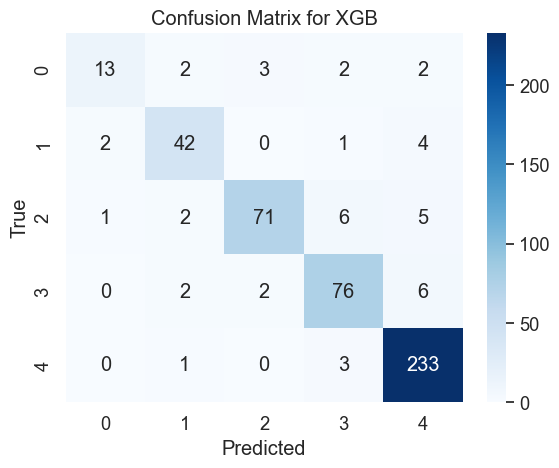

Evaluating AdaBoost...


K:\Software\Python\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: Accuracy = 0.9019
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.36      0.52        22
         1.0       0.80      0.88      0.83        49
         2.0       0.91      0.85      0.88        85
         3.0       0.88      0.88      0.88        86
         4.0       0.93      0.98      0.95       237

    accuracy                           0.90       479
   macro avg       0.88      0.79      0.81       479
weighted avg       0.90      0.90      0.90       479



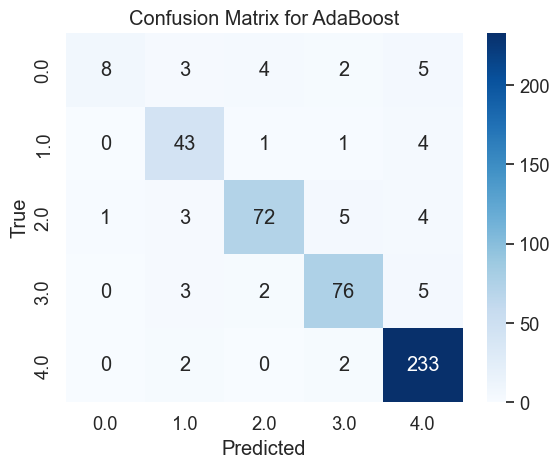

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
num_cols = ['StudyTimeWeekly', 'Absences', 'GPA']
cat_cols = ['Sports', 'Volunteering', 'ParentalSupport', 'Music', 'Extracurricular', 'ParentalEducation', 'Age', 'Gender', 'Tutoring', 'Ethnicity']
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'LGBM': LGBMClassifier(),
    'Bagging': BaggingClassifier(),
    'XGB': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}
X = df1[num_cols + cat_cols]
y = df1['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()